
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the Florida Retirement System.  Construct portfolios from the Investment Options in the Florida Retirement System and examine the results of different weighting schemes.  See https://www.myfrs.com/InvestmentFundTabs.htm


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

# Display all rows.
pd.set_option('display.max_rows', None)

# Do not truncate column names.
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['florida-retirement-system']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized.
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
0,FRS Money Market Fund (60),Cash Equivalents:Money Markets,0.28,1.57,1.39,0.29,1.39,4.79
1,FRS Inflation Sensitive Fund (300),US Bonds:Treasury Inflation-Protected Securities (TIPS),18.24,4.78,4.94,9.13,4.94,0.54
2,FRS U.S.Bond Enhanced Index Fund (80),US Bonds,0.04,5.27,3.25,3.55,3.25,0.92
3,FRS Core Plus Bond Fund (310),US Bonds,6.01,6.18,4.63,4.90,4.63,0.94
4,FRS U.S. Stock Market Index Fund (120),US Stocks,51.01,19.02,17.75,19.43,17.75,0.91
5,FRS U.S. Stock Fund (340),US Stocks,58.07,16.38,16.92,22.43,16.92,0.75
6,FRS Foreign Stock Index Fund (200),Global Stocks,45.64,7.43,10.45,18.14,10.45,0.58
7,FRS Global Stock Fund (210),Global Stocks,57.32,19.88,18.88,18.92,18.88,1.00
8,FRS Foreign Stock Fund (220),Global Stocks,52.82,11.42,13.40,18.80,13.40,0.71
9,FRS Retirement Fund (2000),Balanced:Moderate Allocation (40/60),19.79,8.22,7.50,8.07,7.50,0.93


In [6]:
# Rank.
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
4,FRS U.S. Stock Market Index Fund (120),US Stocks,51.01,19.02,17.75,19.43,17.75,0.91
5,FRS U.S. Stock Fund (340),US Stocks,58.07,16.38,16.92,22.43,16.92,0.75
3,FRS Core Plus Bond Fund (310),US Bonds,6.01,6.18,4.63,4.90,4.63,0.94
2,FRS U.S.Bond Enhanced Index Fund (80),US Bonds,0.04,5.27,3.25,3.55,3.25,0.92
1,FRS Inflation Sensitive Fund (300),US Bonds:Treasury Inflation-Protected Securities (TIPS),18.24,4.78,4.94,9.13,4.94,0.54
7,FRS Global Stock Fund (210),Global Stocks,57.32,19.88,18.88,18.92,18.88,1.00
8,FRS Foreign Stock Fund (220),Global Stocks,52.82,11.42,13.40,18.80,13.40,0.71
6,FRS Foreign Stock Index Fund (200),Global Stocks,45.64,7.43,10.45,18.14,10.45,0.58
0,FRS Money Market Fund (60),Cash Equivalents:Money Markets,0.28,1.57,1.39,0.29,1.39,4.79
10,FRS Retirement Fund (2020),Balanced:Growth Allocation (60/40),22.41,8.67,8.72,9.30,8.72,0.94


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks.
age_portfolio = {
    'Title': 'Age Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Retirement Fund (2025)': 1/3
}

# Put your "age" in Short Term Treasuries and the rest in stocks.
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'FRS Inflation Sensitive Fund (300)': 0.50
}

# Top dogs - top performer by sharpe ratio in each Asset Class, equal weights.
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/5,
    'FRS Global Stock Fund (210)': 1/5,
    'FRS Money Market Fund (60)': 1/5,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/5,
    'FRS Retirement Fund (2020)': 1/5
}

# 50% S&P 500, 50% bonds.
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income.
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Inflation Sensitive Fund (300)': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International.
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S. Stock Fund (340)': 1/4,
    'FRS Global Stock Fund (210)': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account).
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 0.90,
    'FRS Inflation Sensitive Fund (300)': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash.
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'FRS Inflation Sensitive Fund (300)': 0.50,
    'FRS U.S. Stock Market Index Fund (120)': 0.40,
    'FRS Money Market Fund (60)': 0.10
}

# FRS-401k, risk off: 100% fixed income divided between risk free asset, bond fund, and money market.
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'FRS Inflation Sensitive Fund (300)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Money Market Fund (60)': 1/3
}

# FRS-401k, risk on: 100% US stocks bevided between large, emerging markets, and small cap.
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS Global Stock Fund (210)':1/3,
    'FRS U.S. Stock Fund (340)': 1/3
}

# Everything ranked.
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio.
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above.
portfolio_option = top_dog_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved.
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio.
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,FRS U.S. Stock Market Index Fund (120),FRS Global Stock Fund (210),FRS Money Market Fund (60),FRS U.S.Bond Enhanced Index Fund (80),FRS Retirement Fund (2020),Top Dog Portfolio
Annual Returns,17.75,18.88,1.39,3.25,8.72,15.20
Std Dev,19.43,18.92,0.29,3.55,9.30,14.84
Sharpe Ratio,0.91,1.00,4.79,0.92,0.94,1.02
Weight,0.36,0.38,0.03,0.07,0.17,1.00
Worst Typical Down Year,-21.11,-18.96,0.81,-3.85,-9.88,-14.48
Black Swan,-40.54,-37.88,0.52,-7.40,-19.18,-29.33


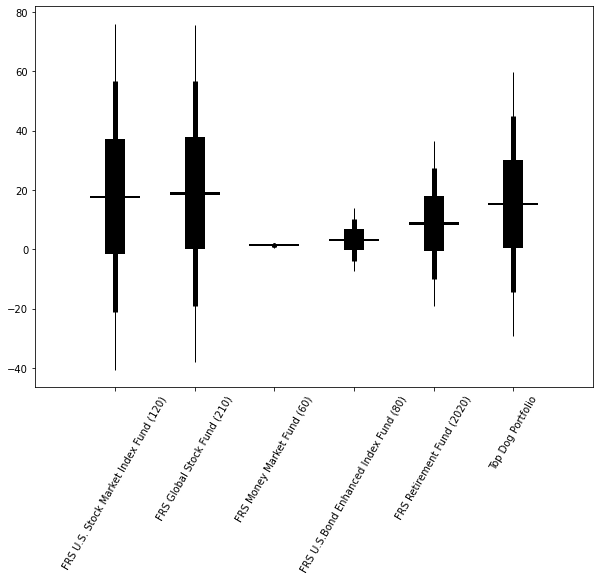

In [13]:
# Display Results.
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

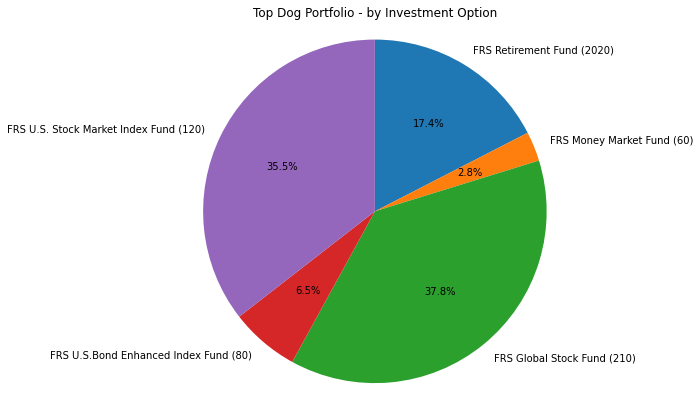

FRS Retirement Fund (2020)               0.17
FRS Money Market Fund (60)               0.03
FRS Global Stock Fund (210)              0.38
FRS U.S.Bond Enhanced Index Fund (80)    0.07
FRS U.S. Stock Market Index Fund (120)   0.36



In [14]:
# Show pie charts of investment and asset class weights.
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights.
bb.print_portfolio(portfolio_option)

Top Dog Portfolio Weights:
    FRS U.S. Stock Market Index Fund (120) 0.3551
    FRS Global Stock Fund (210)    0.3777
    FRS Money Market Fund (60)     0.0278
    FRS U.S.Bond Enhanced Index Fund (80) 0.0650
    FRS Retirement Fund (2020)     0.1744


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete.
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

Top Dog Portfolio Metrics:          
    max_sharpe_ratio            1.27
    annual_return               8.26
    std_dev                     6.49
    worst typical down year    -4.72
    black_swan                -11.21


Top Dog Portfolio Weights:
    FRS U.S. Stock Market Index Fund (120) 0.1300
    FRS Global Stock Fund (210)    0.2000
    FRS Money Market Fund (60)     0.0000
    FRS U.S.Bond Enhanced Index Fund (80) 0.6700
    FRS Retirement Fund (2020)     0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).